In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from collections import OrderedDict
import itertools

In [19]:
from sklearn.metrics import confusion_matrix

## Read Data

In [2]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

In [3]:
# Link for downloading dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/
df = pd.read_csv('iris.data.txt', header = None, names = column_names)

In [4]:
classes = df['class'].unique()

## One Hot Encoding of Labels

In [5]:
# create dictionary to convert labels to index and index to labels.
label_to_idx, idx_to_label = {}, {}
for i, c in enumerate(df['class'].unique()):
    label_to_idx[c] = i
    idx_to_label[i] = c

In [6]:
def get_encoded(y):
    """Encodes the labels as one hot encoding.
    First create an array of zeros of shape (total_samples, num_classes).
    For every sample, set the value 1 at the index value of class and rest will be zero.
    
    Parameter
    ---------
    y: np.array, shape = (total_samples, 1)
    
    Output
    ------
    encoded: np.array, shape = (total_samples, num_classes)
    """
    classes = df['class'].unique()
    
    # creates array of value zero
    encoded = np.zeros((y.shape[0], len(classes)))
    
    # encode
    for i, label in enumerate(y):
        encoded[i][label_to_idx[label]] = 1
    
    return encoded

## Divide into train and test data set

In [7]:
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75

In [8]:
train, test = df[df['is_train'] == True], df[df['is_train'] == False]

In [9]:
print('length of train dataset: %d' %(len(train)))
print('length of test dataset: %d' %(len(test)))

length of train dataset: 109
length of test dataset: 41


In [10]:
train_x = train[train.columns[:len(train.columns) - 2]]
ones = np.ones((train_x.shape[0], 1))
train_x_ones = np.concatenate((ones, train_x), axis = 1)
train_y = get_encoded(train['class'])

In [11]:
test_x = test[test.columns[:len(test.columns) - 2]]
ones = np.ones((test_x.shape[0], 1))
test_x_ones = np.concatenate((ones, test_x), axis = 1)
test_y = test['class']

## Logistic Regression

In [12]:
def sigmoid(score):
    return 1/(1 + np.exp(-score))

In [27]:
def get_cost(train_y, predict_y):
    cost = ((-train_y * np.log(predict_y)) - (1 - train_y) * np.log(1 - predict_y)).mean()
    #cost = 1/(train_y.shape[0]) * cost
    return cost

In [14]:
def get_pred(pred_ind, n_classes):
    result = []
    for ind in pred_ind:
        res = np.zeros((n_classes))
        res[ind] = 1
        result.append(res)
    
    return np.array(result)

In [15]:
def linear_reg(train_x, train_y, lr=0.0001, epochs=1, n_classes = 3):
    ones = np.ones((train_x.shape[0], 1))
    train_x_ones = np.concatenate((ones, train_x), axis = 1)
    w = np.zeros((train_x_ones.shape[1], n_classes))
    itr = 0
    while itr < epochs:
        score = np.dot(train_x_ones, w)
        predict_y = sigmoid(score)
        cost = get_cost(train_y, predict_y)
        pred_index = np.argmax(predict_y, axis = 1)
        predict_y = get_pred(pred_index, n_classes)
        gradient = np.dot(np.transpose(train_x_ones), (predict_y - train_y))
        w = w - lr * gradient
        print("Itr: {}, loss: {}".format(itr, cost))
        itr += 1
    predict = np.dot(train_x_ones, w)
    return w

In [ ]:
model = linear_reg(train_x, train_y, epochs = 10000)

In [17]:
def get_predicted_class(predicted):
    predicted_class = [classes[np.where(p == 1)] for p in predicted]
    return np.array(predicted_class)

In [41]:
pred_score = np.dot(test_x_ones, model)
pred_index = np.argmax(pred_score, axis = 1)
pred_y = get_pred(pred_index, n_classes=3)
pred = get_predicted_class(pred_y)

In [42]:
cm = confusion_matrix(test_y.values, pred, labels = classes)

In [21]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[17  0  0]
 [ 0 13  0]
 [ 0  0 11]]


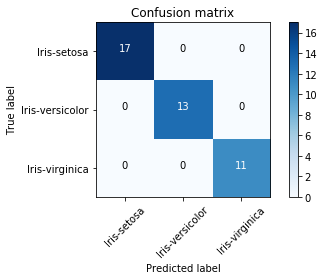

In [43]:
plt.figure()
plot_confusion_matrix(cm, classes)
plt.show()